#Challenge 5: Titanic

Importing Essential Libraries for the analysis

In [1]:
import pandas as pd
from siuba import *
from plotnine import *
import plotly.express as px

Importing Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv')

Inspection of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Ok.. This is kind of a example of complex dataset. We should remember that we are free to do the analysis here as our own will. So at first I will try to answer the requred question. After that I will try to solve or find out some more insight of my own.

More than that we need to tidy up the data. The cabin column should be removed
immense missing data and the nature of randomness.

In [5]:
data = data >> select(~_.Cabin)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now as the 'cabin' column is removed from the scenario, we need to modify the survived column. The whole binary idea wasn't good enough. Also the Let's make Pclass more 'String' wise proper

In [7]:
data['Survived']=data['Survived'].replace({0:"No", 1:"Yes"})
data['Pclass']= data['Pclass'].replace({1:"First Class", 2:"Second Class", 3:"Third Class"})

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,Third Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Yes,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Yes,Third Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,Yes,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,No,Third Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now We can start out analysis.

Set PassengerId as the index.

In [9]:
data.set_index('PassengerId', inplace=True)

Create a pie chart presenting the male/female as proportions

In [10]:
gender_proportions = data >> count(_.Sex)

In [11]:
px.pie(data['Sex'], names='Sex', title='Sex Proportions').show()



Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning:

geom_point : Removed 177 rows containing missing values.



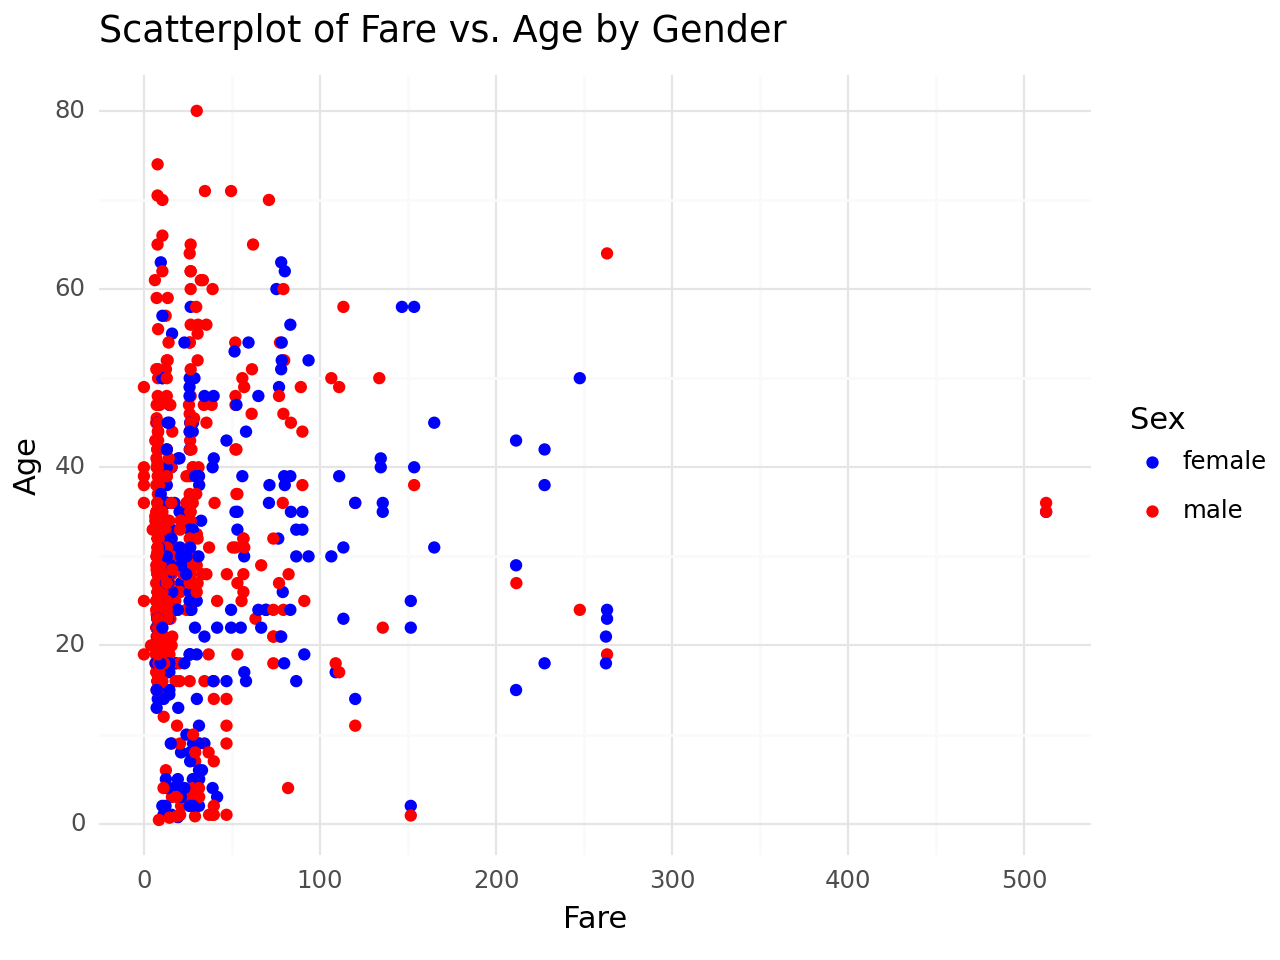

<Figure Size: (640 x 480)>

In [12]:
(ggplot(data, aes(x='Fare', y='Age', color='Sex')) +
    geom_point() +
    labs(title='Scatterplot of Fare vs. Age by Gender', x='Fare', y='Age') +
    scale_color_manual(values=['blue', 'red']) +  # Customize colors if desired
    theme_minimal())

How many people survived?

In [13]:
data >> count(_.Survived) >> filter (_.Survived == 'Yes')

,Survived,n
1,Yes,342


Create a histogram with the Fare payed



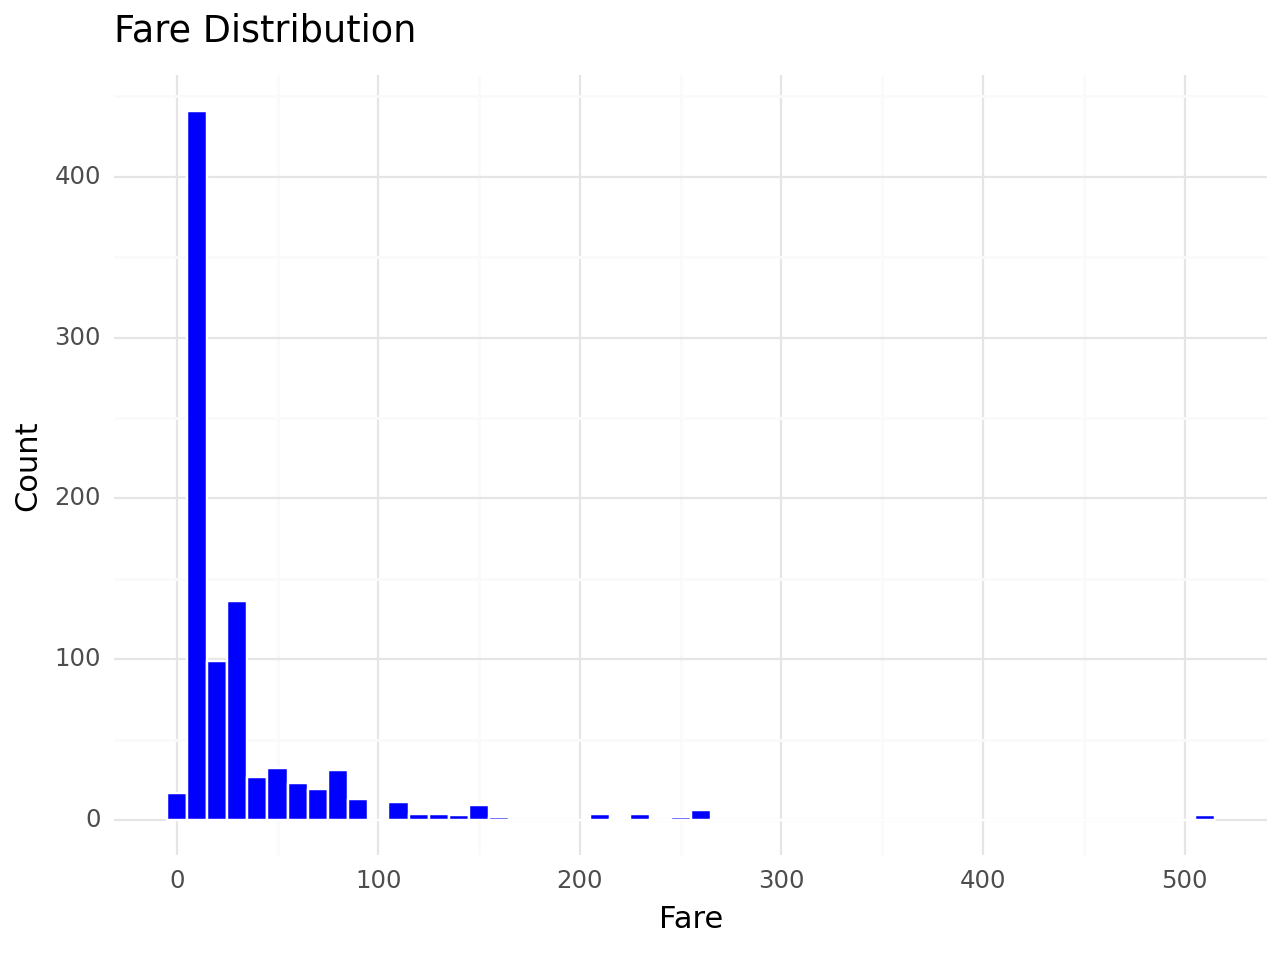

<Figure Size: (640 x 480)>

In [14]:
(ggplot(data, aes(x='Fare')) +
    geom_histogram(binwidth=10, fill='blue', color='white') +
    labs(title='Fare Distribution', x='Fare', y='Count') +
    theme_minimal())

Additional bonus analysis

What is the distribution of passenger classes (Pclass) in the dataset? Create a bar chart to visualize it.

In [15]:
passenger_class_dist = data >> count(_.Pclass)

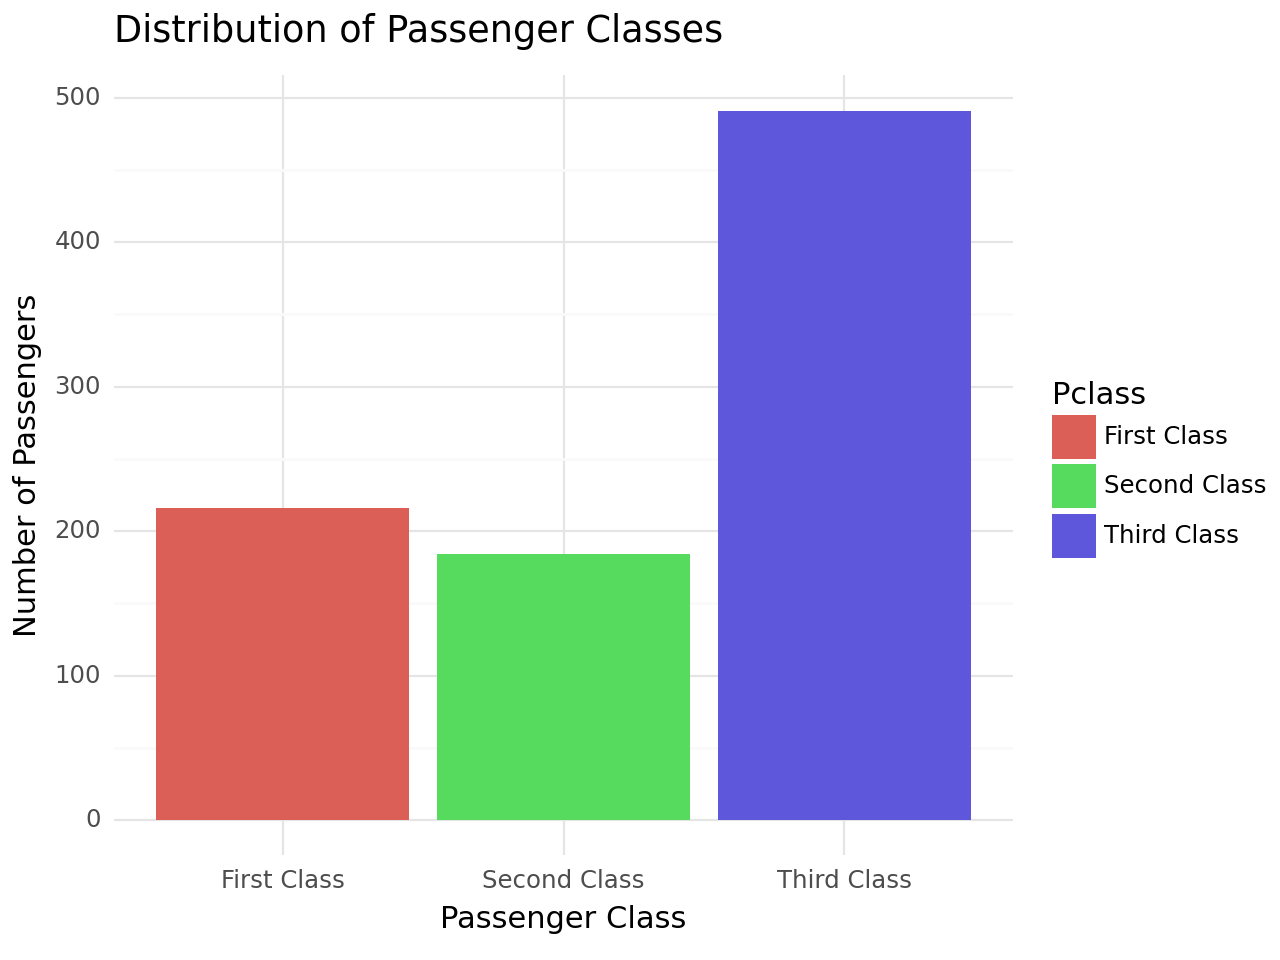

<Figure Size: (640 x 480)>

In [16]:
(ggplot(passenger_class_dist, aes(x='Pclass', y='n', fill='Pclass')) +
    geom_bar(stat='identity') +
    labs(title='Distribution of Passenger Classes', x='Passenger Class', y='Number of Passengers') +
    theme_minimal())

What is the average age of passengers? Compute and display the result.

In [17]:
data >> _.Age.mean()

29.69911764705882

How many passengers embarked from each of the three ports (Embarked)? Create a bar chart to represent this information.

In [18]:
embarksion_port = data >> count(_.Embarked)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:344: PlotnineWarning:

position_stack : Removed 1 rows containing missing values.



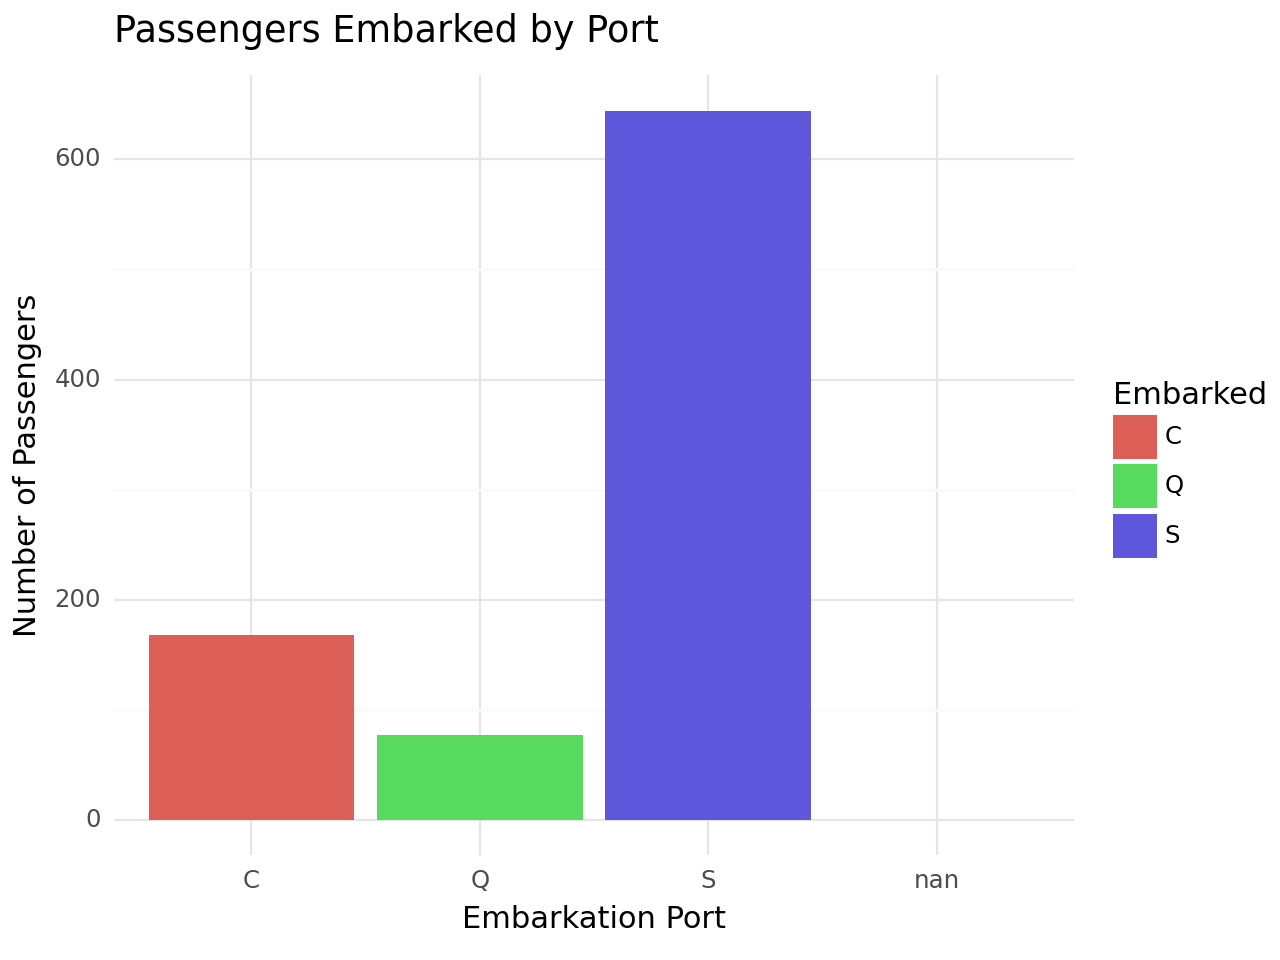

<Figure Size: (640 x 480)>

In [19]:
(ggplot(embarksion_port, aes(x='Embarked', y='n', fill='Embarked')) +
    geom_bar(stat='identity') +
    labs(title='Passengers Embarked by Port', x='Embarkation Port', y='Number of Passengers') +
    theme_minimal())

Calculate and display the correlation coefficient between age (Age) and fare paid (Fare).

In [20]:
data[['Age', 'Fare']].corr().iloc[0, 1]

0.09606669176903912

Create a box plot to visualize the distribution of fares paid by each passenger class (Pclass).

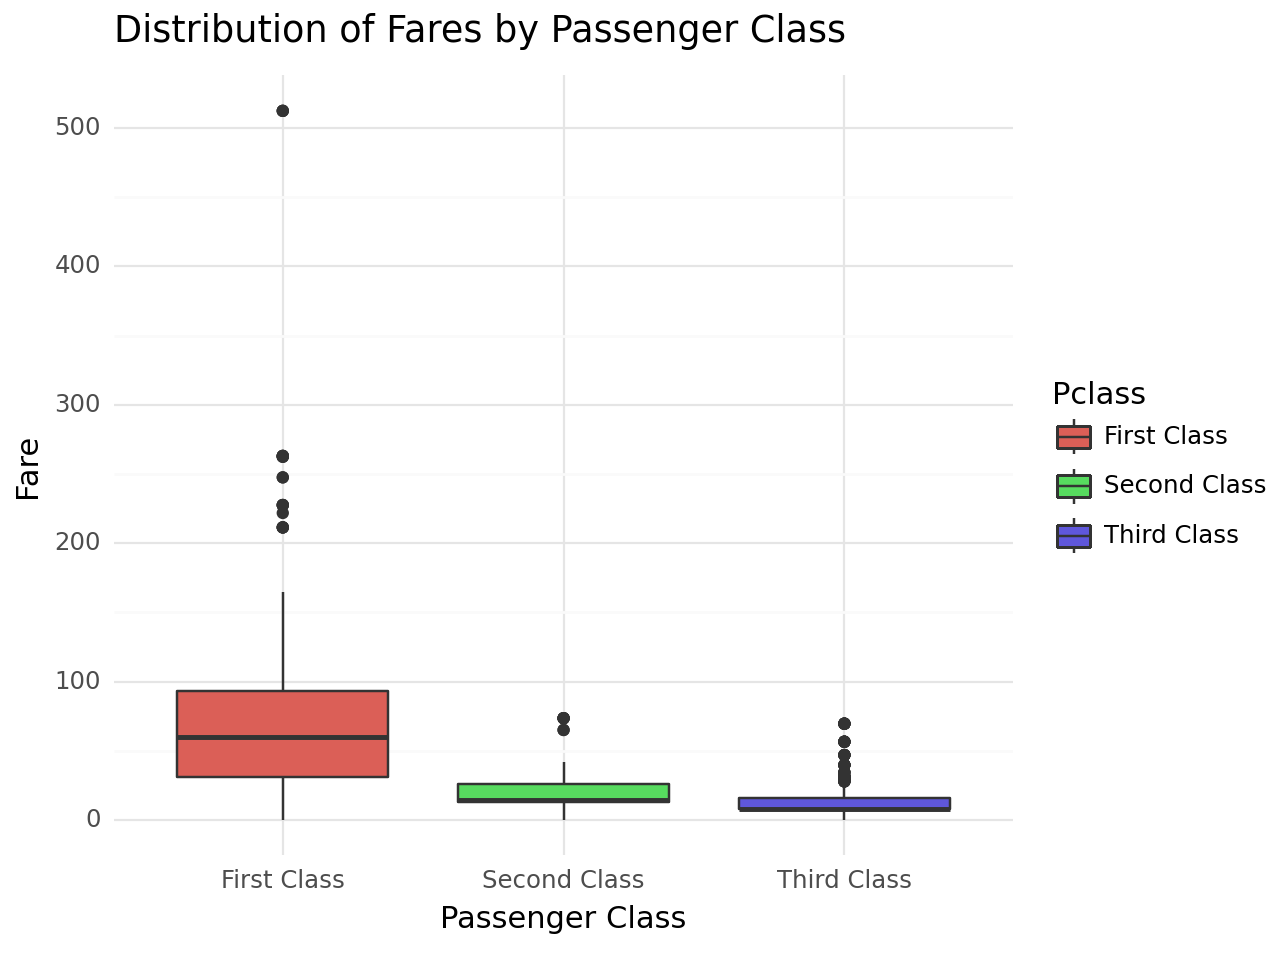

<Figure Size: (640 x 480)>

In [21]:
(ggplot(data, aes(x='Pclass', y='Fare', fill='Pclass'))
    + geom_boxplot()
    + labs(title='Distribution of Fares by Passenger Class', x='Passenger Class', y='Fare')
    + theme_minimal())